In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [2]:
test_data=pd.read_csv('test_lAUu6dG.csv')
test_data_1=test_data.copy()
df=pd.read_csv('train_ctrUa4K.csv')
df.drop('Loan_ID',axis=1,inplace=True)
df.rename(columns={'Loan_Status': 'Loan'},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. cleaning and handling missing values

In [3]:
df.shape
df.isnull().sum()
df.info()
# no case of missing > threshold (40%) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan               614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## best method of imputation (very_imp)

In [4]:
from sklearn.impute import SimpleImputer
num_columns=[cols for cols in df.select_dtypes(exclude=['object'])]
object_columns=[cols for cols in df.select_dtypes(include=['object'])]
num_impute=SimpleImputer(strategy='mean')
cat_impute=SimpleImputer(strategy='most_frequent')

In [5]:
df_k=pd.DataFrame(num_impute.fit_transform(df[num_columns]))
df_k.columns=num_columns
df_m=pd.DataFrame(cat_impute.fit_transform(df[object_columns]))
df_m.columns=object_columns
df1=pd.concat([df_m,df_k],axis=1)
df1=df1[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History','Property_Area','Loan']]
df1['Credit_History']
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [6]:
df1['Credit_History'].replace(to_replace=0.8421985815602837,value=1,inplace=True)

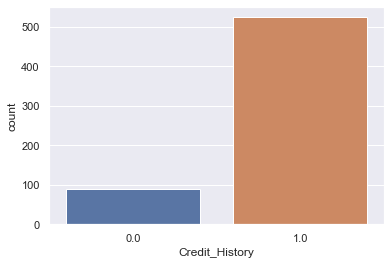

In [7]:
sns.countplot(x='Credit_History',data=df1)

very basic method of imputation

In [8]:
#df1=pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(df))
#df1.columns=df.columns
#df1.head()                                                                      

## Data Visualisation
1. target == Loan
2. numeric_data ==  Applicantincome,Co-app income, Loan_amount, term
3. categorical_data == Gender,marriage, education, area,dependents,self_employed 

### checking relation between numeric data
### 1. regplot,lmplot
### 2.heatplot for correlation
### 3.kdeplot,boxplot

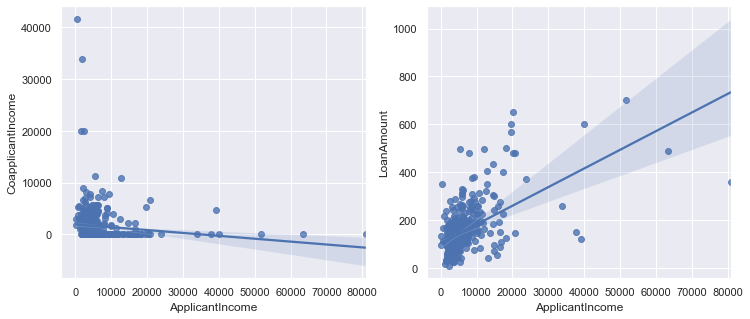

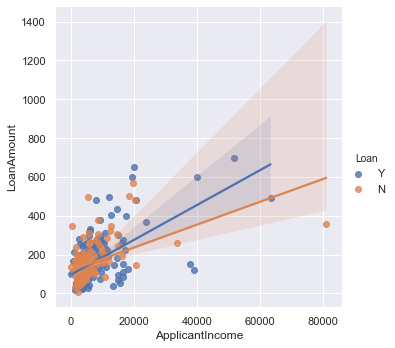

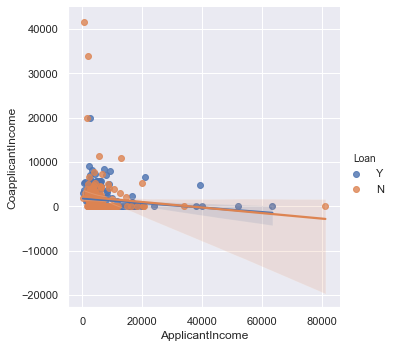

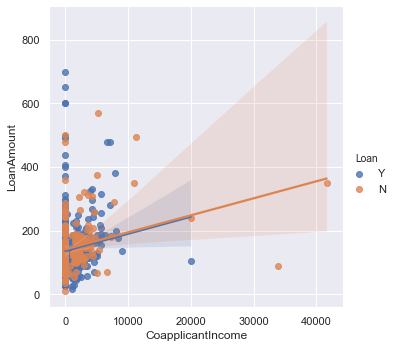

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.regplot(x='ApplicantIncome',y='CoapplicantIncome',data=df1)
plt.subplot(1,2,2)
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df1)
sns.lmplot(x='ApplicantIncome',y='LoanAmount',hue='Loan',data=df1)
sns.lmplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan',data=df1)
sns.lmplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan',data=df1)

#### co-applicant income seems to be very poor indicator for loan approval, better to remove it
#### also it is seen that of all num_cols Loan_amount,applicant_income,credit_history have considerabel effect on loan approval
#### and loan_term and co applicant have little effect (check accuracy witha and without this)

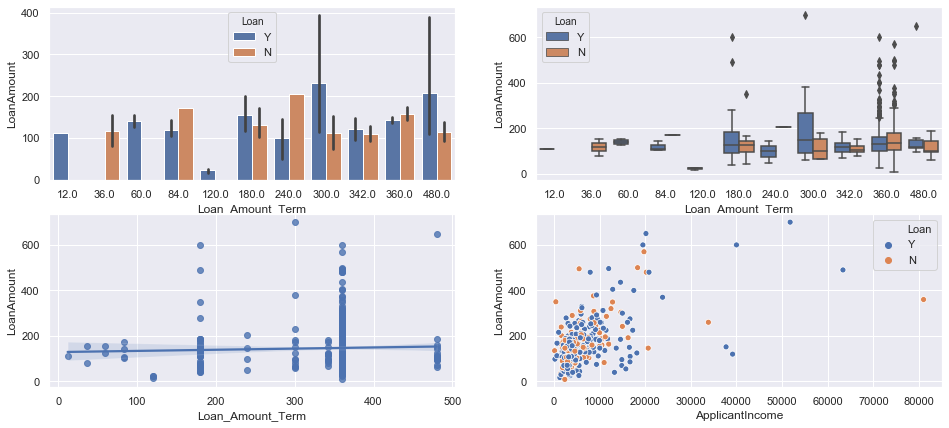

In [10]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
sns.barplot(y='LoanAmount',x='Loan_Amount_Term',hue='Loan',data=df1)
plt.subplot(2,2,2)
sns.boxplot(y='LoanAmount',x='Loan_Amount_Term',hue='Loan',data=df1)
plt.subplot(2,2,3)
sns.regplot(y='LoanAmount',x='Loan_Amount_Term',data=df1)
plt.subplot(2,2,4)
sns.scatterplot(y='LoanAmount',x='ApplicantIncome',hue='Loan',data=df1)
#sns.lmplot(y='LoanAmount',x='Loan_Amount_Term',hue='Loan',data=df1)

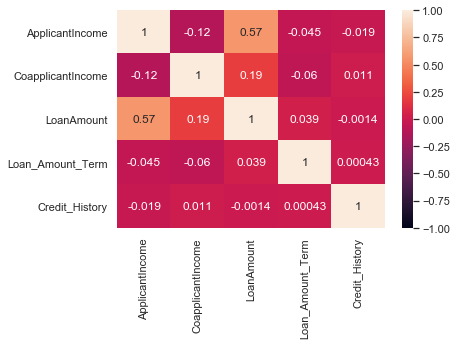

In [11]:
df2=df1.corr()
sns.heatmap(df2,annot=True,vmin=-1)

### credit_history, loan_amount, applicant income have high, Loan_term,co-app income have medium influence

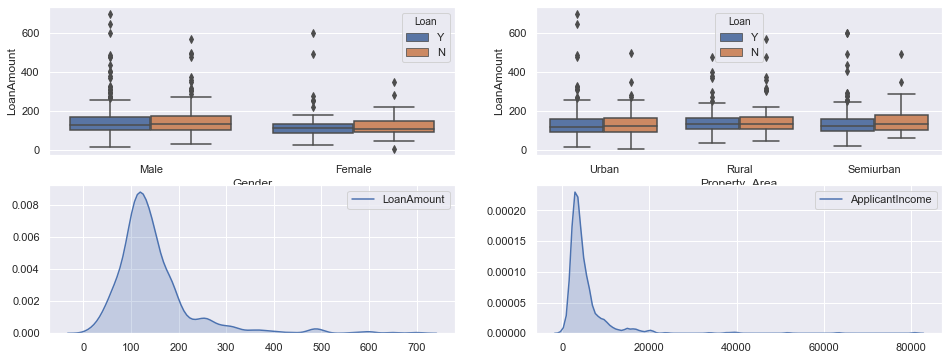

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.boxplot(x='Gender',y='LoanAmount',hue="Loan",data=df1)
plt.subplot(2,2,2)
sns.boxplot(x='Property_Area',y='LoanAmount',hue="Loan",data=df1)
plt.subplot(2,2,3)
sns.kdeplot(df1['LoanAmount'],shade=True)
plt.subplot(2,2,4)
sns.kdeplot(df1['ApplicantIncome'],shade=True)

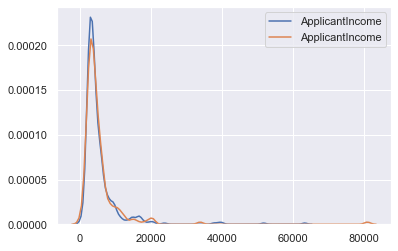

In [13]:
sns.kdeplot(data=df1[df1['Loan']=='Y'].ApplicantIncome)
sns.kdeplot(data=df1[df1['Loan']=='N'].ApplicantIncome)

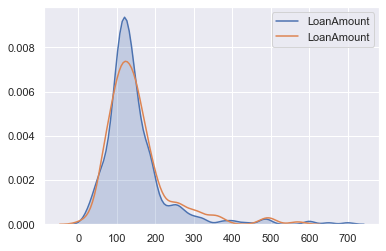

In [14]:
sns.kdeplot(data=df1[df1['Loan']=='Y'].LoanAmount,shade=True)
sns.kdeplot(data=df1[df1['Loan']=='N'].LoanAmount)

## in the above plot change is seen clearly whereas in below plot very little change is seen

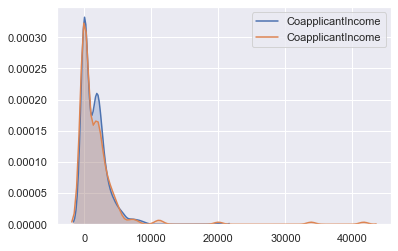

In [15]:
sns.kdeplot(data=df1[df1['Loan']=='Y'].CoapplicantIncome,shade=True)
sns.kdeplot(data=df1[df1['Loan']=='N'].CoapplicantIncome,shade=True)

####  max of applicants have income around 5000 and LoanAmount around 150

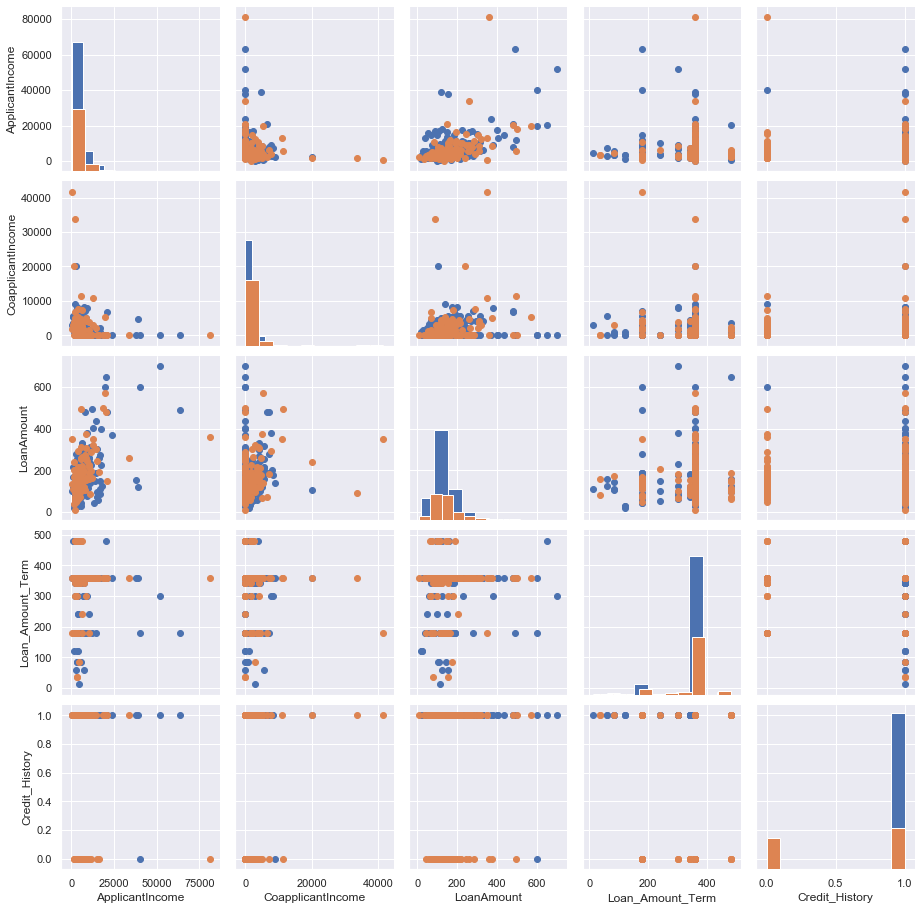

In [16]:
x=sns.PairGrid(df1,hue='Loan')
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)

In [17]:
df1.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

## checking relation between categorical data
 categorical_data=Gender, Married, Education, selfEmployed, Property_area, Dependents

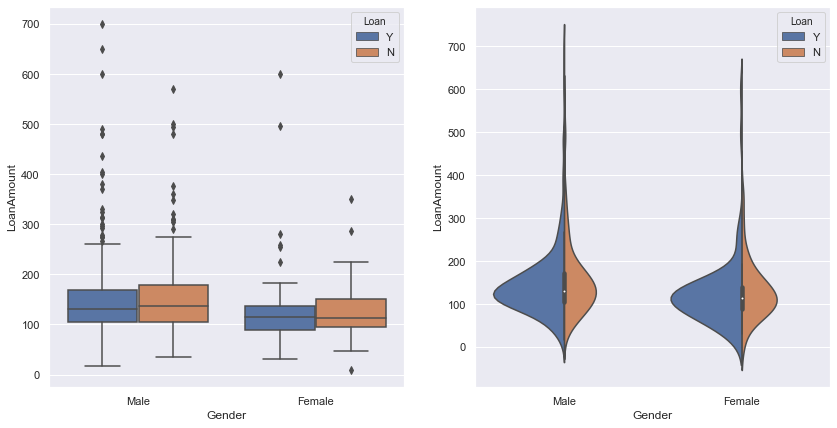

In [18]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(x='Gender',y='LoanAmount',hue='Loan',data=df1)
#x=sns.swarmplot(x='Gender',y='LoanAmount',hue='Loan',data=df1)
#x=sns.countplot(x='Gender',hue='Loan',data=df1)
plt.subplot(1,2,2)
sns.violinplot(x='Gender',y='LoanAmount',hue="Loan",split=True,scale='count',data=df1)

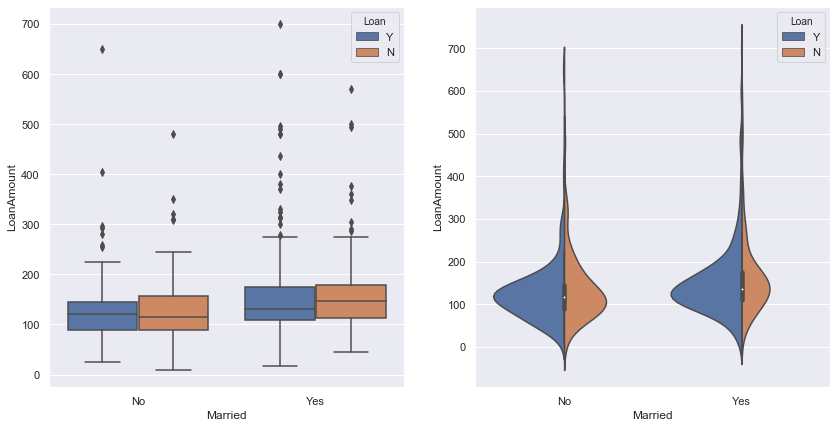

In [19]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(x='Married',y='LoanAmount',hue='Loan',data=df1)
#x=sns.swarmplot(x='Gender',y='LoanAmount',hue='Loan',data=df1)
#x=sns.countplot(x='Gender',hue='Loan',data=df1)
plt.subplot(1,2,2)
sns.violinplot(x='Married',y='LoanAmount',hue="Loan",split=True,scale='count',data=df1)

##### not much considerable effect of gender and married but given LoanAmount Male, Married have chances of loan approval 

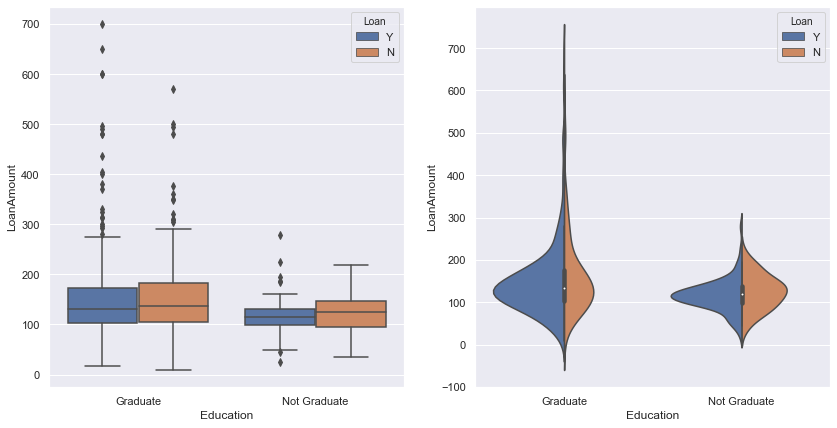

In [20]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(x='Education',y='LoanAmount',hue='Loan',data=df1)
#x=sns.swarmplot(x='Gender',y='LoanAmount',hue='Loan',data=df1)
#x=sns.countplot(x='Gender',hue='Loan',data=df1)
plt.subplot(1,2,2)
sns.violinplot(x='Education',y='LoanAmount',hue="Loan",split=True,scale='count',data=df1)

##### strong relation is seen in this case  : graduate high chance of loan approval

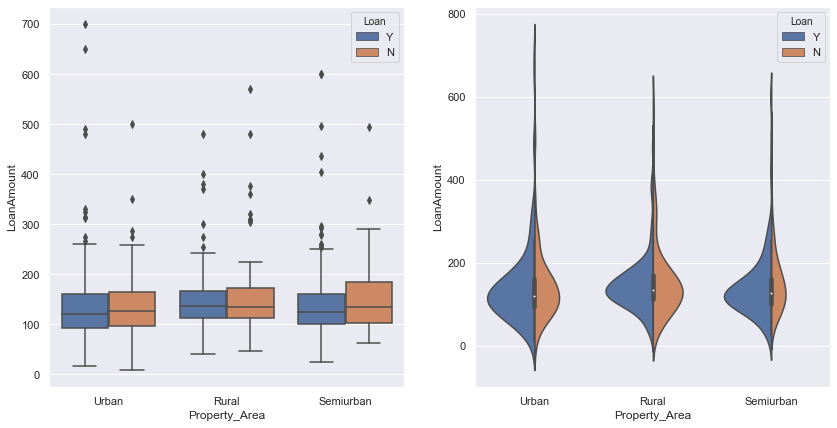

In [21]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(x='Property_Area',y='LoanAmount',hue='Loan',data=df1)
#x=sns.swarmplot(x='Gender',y='LoanAmount',hue='Loan',data=df1)
#x=sns.countplot(x='Gender',hue='Loan',data=df1)
plt.subplot(1,2,2)
sns.violinplot(x='Property_Area',y='LoanAmount',hue="Loan",split=True,scale='count',data=df1)

#### semi urban less chance of neglection whereas urban high approval

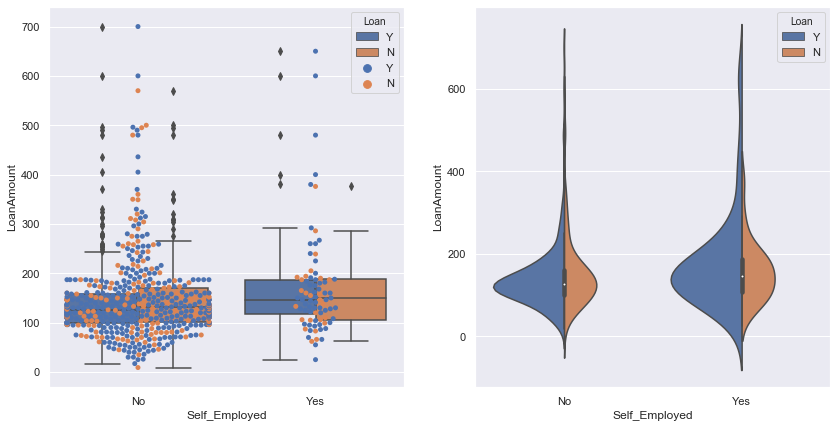

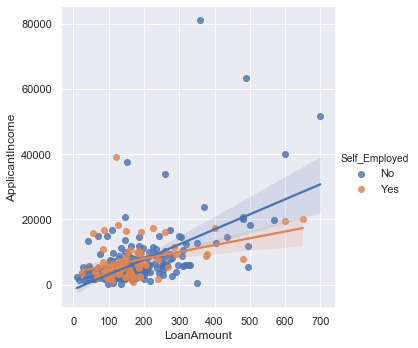

In [22]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(x='Self_Employed',y='LoanAmount',hue='Loan',data=df1)
sns.swarmplot(x='Self_Employed',y='LoanAmount',hue='Loan',data=df1)
#x=sns.countplot(x='Gender',hue='Loan',data=df1)
plt.subplot(1,2,2)
sns.violinplot(x='Self_Employed',y='LoanAmount',hue="Loan",split=True,scale='count',data=df1)
sns.lmplot(x="LoanAmount",y='ApplicantIncome',hue='Self_Employed',data=df1)

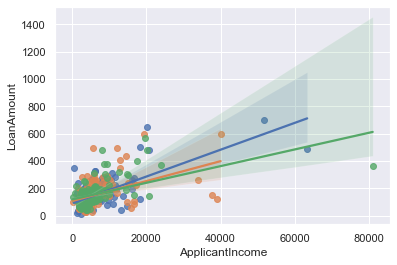

In [23]:
#sns.countplot(x='Property_Area',data=df1)
#df1[df1['Property_Area']=='Urban'].Loan.value_counts()
#df1[df1['Property_Area']=='Semiurban'].Loan.value_counts()
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df1[df1['Property_Area']=='Urban'])
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df1[df1['Property_Area']=='Semiurban'])
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df1[df1['Property_Area']=='Rural'])

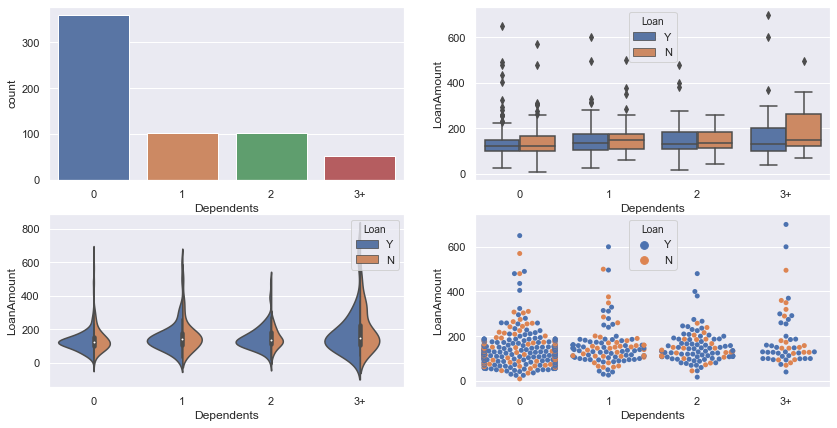

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.countplot(x='Dependents',data=df1)
plt.subplot(2,2,2)
sns.boxplot(x='Dependents',y='LoanAmount',hue="Loan",data=df1)
plt.subplot(2,2,3)
sns.violinplot(x='Dependents',y='LoanAmount',hue="Loan",data=df1,split=True,scale='count')
plt.subplot(2,2,4)
sns.swarmplot(x='Dependents',y='LoanAmount',hue="Loan",data=df1)

#### doesn't seem to show great effect on loan approval can neglect this feature

#### in conclusion we will drop coapplicant Income,Dependents,Loan_Amount_Term

## CATEGORICAL ENCODING
we have to do it for features== Gender,Married,Self_Employed,Property_Area,Education 
<br> target_variable=Loan labelencoder()

In [25]:
from sklearn.preprocessing import OneHotEncoder
encode_cols=['Gender','Married','Self_Employed','Education','Property_Area']
OH_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
                                      #OH_encoder.get_feature_names(encode_cols)

In [26]:
encoded_df1=pd.DataFrame(OH_encoder.fit_transform(df1[encode_cols]))
encoded_df1.columns=OH_encoder.get_feature_names(encode_cols)
encoded_df1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [28]:
df2=df1.copy()
df2.drop(encode_cols,axis=1,inplace=True)
df2.drop(['Loan','Dependents','Loan_Amount_Term','CoapplicantIncome'],axis=1,inplace=True)      # in greed added co app income,loan_amount term
df2['Loan_n']=pd.DataFrame(le_encoder.fit_transform(df1['Loan']))

In [29]:
df2=pd.concat([df2,encoded_df1],axis=1)
df2.head()

,ApplicantIncome,LoanAmount,Credit_History,Loan_n,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,146.412162,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583.0,128.000000,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,66.000000,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,2583.0,120.000000,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,141.000000,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [30]:
df2=df2[['ApplicantIncome','LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male',
       'Self_Employed_No', 'Self_Employed_Yes', 'Education_Graduate',
       'Education_Not Graduate',                              #removing Married and Property_Area encoded cols
        'Loan_n']]
df2.head()

,ApplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Loan_n
0,5849.0,146.412162,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
1,4583.0,128.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2,3000.0,66.000000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,2583.0,120.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
4,6000.0,141.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


## MODEL FITTING AND CROSS VALIDATION

In [31]:
X=df2.drop('Loan_n',axis=1)
Y=df2.Loan_n

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
svm_clf=SVC()
cross_val_score(svm_clf,X,Y)

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

In [34]:
Dec_tree=DecisionTreeClassifier()
cross_val_score(Dec_tree,X,Y)

array([0.65853659, 0.68292683, 0.65853659, 0.77235772, 0.69672131])

In [35]:
gboost=GradientBoostingClassifier(n_estimators=2000,learning_rate=0.05,n_iter_no_change=50)
cross_val_score(gboost,X,Y)

array([0.80487805, 0.74796748, 0.7804878 , 0.84552846, 0.7704918 ])

In [36]:
rndm_forest=RandomForestClassifier(n_estimators=1000)
cross_val_score(rndm_forest,X,Y)

array([0.76422764, 0.72357724, 0.76422764, 0.78861789, 0.81147541])

In [37]:
log_reg_clf=LogisticRegression(max_iter=1000)
cross_val_score(log_reg_clf,X,Y)

array([0.81300813, 0.77235772, 0.7804878 , 0.70731707, 0.80327869])

In [38]:
ada_boost=AdaBoostClassifier(n_estimators=1000,learning_rate=0.05,algorithm='SAMME')
cross_val_score(ada_boost,X,Y)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

## experiment with lightGBM

In [55]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [57]:
import lightgbm as lgb

## learn how to manage the parameters

In [181]:
d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 1200
params['min_data'] = 20
params['max_depth'] = 10
clf = lgb.train(params, d_train, 750)

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [183]:
from sklearn.metrics import accuracy_score
Y_pred=clf.predict(X_test)

In [184]:
# convert predictions into binary values
for i in range(len(Y_test)):
    if Y_pred[i]>=0.48:
        Y_pred[i]=1
    else:
        Y_pred[i]=0

In [185]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.9032258064516129

####  seems like gradient boosting , log_reg works,ada_boost better

### hyper parameter tuning in greed to increase score
    tune the models svm, rndm forest, gradient boosting and logistic regression

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn import svm
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)

## Noob Submission

In [41]:
test_data.drop(['Loan_ID','Dependents'],axis=1,inplace=True)

In [42]:
test_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [44]:
num_columns=[cols for cols in test_data.select_dtypes(exclude=['object'])]
object_columns=[cols for cols in test_data.select_dtypes(include=['object'])]

In [45]:
num_transformer=SimpleImputer(strategy='mean')
categorical_transformer=Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [46]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_columns),
    ('cat',categorical_transformer,object_columns)
])

In [186]:
encoded_cols=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Self_Employed_No', 'Self_Employed_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
test_df=pd.DataFrame(preprocessor.fit_transform(test_data))
test_df.columns=encoded_cols
test_df.drop(['CoapplicantIncome','Loan_Amount_Term','Married_No', 'Married_Yes','Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],axis=1,inplace=True)
test_df.replace(to_replace=0.8254437869822485,value=1,inplace=True)
test_df.head()

,ApplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,5720.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,3076.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,5000.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,2340.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,3276.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


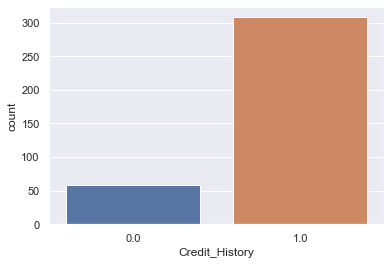

In [48]:
sns.countplot(x='Credit_History',data=test_df)

In [49]:
#model=gboost
#model=log_reg_clf
#model=rndm_forest
#model=ada_boost

In [190]:
predictions=clf.predict(test_df)
for i in range(int(len(test_df))):
    if predictions[i]>=0.49:
        predictions[i]=1
    else:
        predictions[i]=0

In [193]:
#predictions

In [192]:
submission=test_data_1[['Loan_ID']]
submission['Loan_Status']=predictions
submission['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)
submission.head()
#submission.to_csv('submission_15_lightgbm.csv',index=False)

C:\Users\RAHUL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAHUL\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## verification

In [52]:
test_data_1['Loan_p']=predictions
test_data_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_p
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


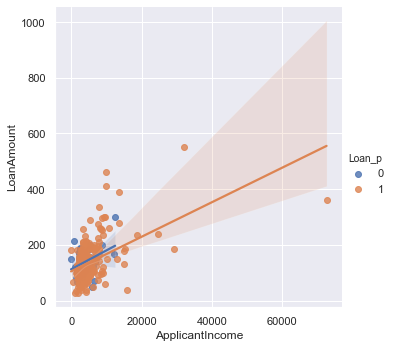

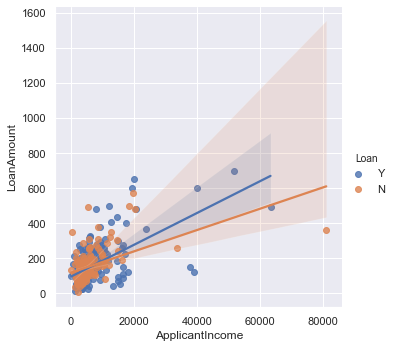

In [53]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_p',data=test_data_1)
sns.lmplot(x='ApplicantIncome',y='LoanAmount',hue='Loan',data=df)